什么是决策树？
如果将决策树和上一章的分类器一起讲述，那么决策树这种算法也是用于对物品分类的，书有一个非常简单的例子，能帮助我理解什么是决策树。
给你一个水果，你可以通过以下方式判断出这是一个什么水果。

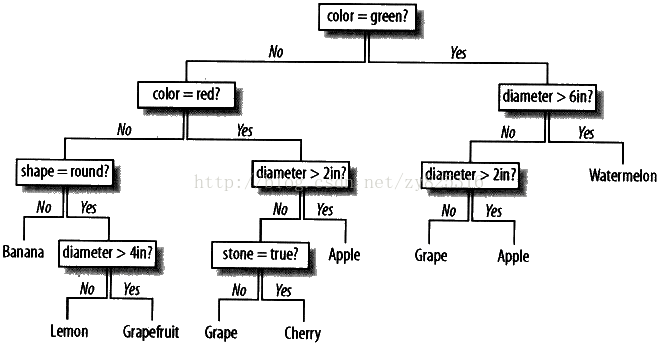

可以看出，决策树上就是一个又一个if-then的语句联系起来的。而且从最终结果，我们也能够看出整个推理的过程。而上一章讲述的贝叶斯分类器里每一个单词的重要性通过计算而得到的。

实例  

背景  

书中还是通过实例来带领我们学习。背景：一个网站，网站的功能被分为了基本或高级，网站被很多用户使用了一段时间。用户在使用过程中，我们统计了一下信息：

    我们想知道哪些用户可能成为付费用户。

显然，如果高级功能（premium）是付费用户专属，那么我们就想知道哪种用户（来自哪里的，ip是哪的，浏览网页多少次的）更会使用高级功能，更可能成为我们的付费用户。比如：上图中，所有来自网站为google的用户都会使用premium高级功能，这样了，我们就知道应该加大在google上做广告的力度，因为google那边过来的用户更有可能使用高级功能，更可能成为我们的会员。
由此，注意两点：

    使用决策树的时候，我们必然需要一些原始的数据对决策树进行训练，这些数据都包含了用户最终的选择、或者结果。也就是需要有输入和输出的数据。之前的博客也说过决策树属于监督类学习。
    虽然在上面的例子中，我们能够直观的看出来自google的用户，更容易成为会员（看起来我们就已经找到了成为会员的关键）。但是实际情况不是那么简单，请继续看本博客就知道了。此外，如果原始数据特别多的时候，用肉眼观察是非常辛苦的。




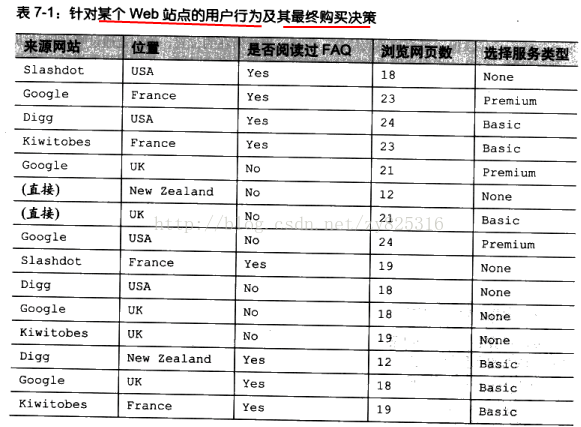

数据集  
书中为我们准备了数据集，就是上面那幅表的内容，用列表数组表示：

In [4]:

my_data=[['slashdot','USA','yes',18,'None'],  
        ['google','France','yes',23,'Premium'],  
        ['digg','USA','yes',24,'Basic'],  
        ['kiwitobes','France','yes',23,'Basic'],  
        ['google','UK','no',21,'Premium'],  
        ['(direct)','New Zealand','no',12,'None'],  
        ['(direct)','UK','no',21,'Basic'],  
        ['google','USA','no',24,'Premium'],  
        ['slashdot','France','yes',19,'None'],  
        ['digg','USA','no',18,'None'],  
        ['google','UK','no',18,'None'],  
        ['kiwitobes','UK','no',19,'None'],  
        ['digg','New Zealand','yes',12,'Basic'],  
        ['slashdot','UK','no',21,'None'],  
        ['google','UK','yes',18,'Basic'],  
        ['kiwitobes','France','yes',19,'Basic']]  

树中节点的表示  

就像上面那个水果的例子一样，决策树实际上是由一个又有一个的节点组成的。在代码中，我们用一个类来表示：

In [5]:
#这是决策树的表达形式：一个一个的节点。每一个节点有五个属性。
class decisionnode:
    def __init__(self,col=-1,value=None,results=None,tb=None,fb=None):
        #被判断条件的对应的列的索引号，如图中：来源网站，是否阅读过FAQ的列序号  
        self.col = col
        
        #什么情况下被判定为真？就看这个value的值，如果value为Yes（对应是否阅读过FAQ），也是Yes的时候为真。
        #如果是大于20（对应浏览页数）那就是大于20为真  
        self.value = value
        
        #最终结果，只有叶节点才有这个值，分类结果或者判定的结果
        self.results = results
        
        #也是一个decisionnode，t代表true，为true的话，就走这个节点。叶节点，没有这个，但是有结果  
        self.tb = tb
        
        #也是一个decisionnode，t代表false，为false的话，就走这个节点。叶节点，没有这个，但是有结果  
        self.fb = fb

构建树
我们分类回归树的算法（CART，Classification And Regression Tree）来构建树。该算法的思想是：首先创建一个根节点，然后我们选择所有统计到里面的数据的一个（就是中的一个）来对初始数据集进行划分。比如，根节点处，我们选择是否阅读过FAQ来对节点进行拆分，就可以拆分成"看过"和”没看过”的两个数据集，抽取两个数据集的最后的一列，也就是我们关心的用户使用的功能，由此可知是否是有可能成为付费会员。如下图所示：

所以，根据我们这个需求，代码我们写了如下函数：`

In [6]:
#根据某一列，对数据进行拆分成两个set，一个set代表选true的时候，一个set代表选false的时候 
def divideset(rows,column,value):
    #定义了一个新函数，用这个函数去判断每一行数据是属于第一组（true），还是第二组（false） 
    spilt_function = None
    if isinstance(value,int) or isinstance(value,float):
        split_function = lambda row:row[column]>=value
    else:
        split_function = lambda row:row[column]==value
    #将数据集根据上面的函数，以及为真条件，判断，并返回
    
    #用split_function函数判断一下，如果成功就是放在set1 
    set1 = [row for row in rows if split_function(row)]
    
    #用split_function函数判断一下，如果失败就是放在set2  
    set2 = [row for row in rows if not split_function(row)]
    return (set1,set2)

In [7]:
s = divideset(my_data,2,'yes')
s

([['slashdot', 'USA', 'yes', 18, 'None'],
  ['google', 'France', 'yes', 23, 'Premium'],
  ['digg', 'USA', 'yes', 24, 'Basic'],
  ['kiwitobes', 'France', 'yes', 23, 'Basic'],
  ['slashdot', 'France', 'yes', 19, 'None'],
  ['digg', 'New Zealand', 'yes', 12, 'Basic'],
  ['google', 'UK', 'yes', 18, 'Basic'],
  ['kiwitobes', 'France', 'yes', 19, 'Basic']],
 [['google', 'UK', 'no', 21, 'Premium'],
  ['(direct)', 'New Zealand', 'no', 12, 'None'],
  ['(direct)', 'UK', 'no', 21, 'Basic'],
  ['google', 'USA', 'no', 24, 'Premium'],
  ['digg', 'USA', 'no', 18, 'None'],
  ['google', 'UK', 'no', 18, 'None'],
  ['kiwitobes', 'UK', 'no', 19, 'None'],
  ['slashdot', 'UK', 'no', 21, 'None']])

In [8]:

set1,set2=divideset(my_data,2,'yes')  
print (set1)  
print (set2)  

[['slashdot', 'USA', 'yes', 18, 'None'], ['google', 'France', 'yes', 23, 'Premium'], ['digg', 'USA', 'yes', 24, 'Basic'], ['kiwitobes', 'France', 'yes', 23, 'Basic'], ['slashdot', 'France', 'yes', 19, 'None'], ['digg', 'New Zealand', 'yes', 12, 'Basic'], ['google', 'UK', 'yes', 18, 'Basic'], ['kiwitobes', 'France', 'yes', 19, 'Basic']]
[['google', 'UK', 'no', 21, 'Premium'], ['(direct)', 'New Zealand', 'no', 12, 'None'], ['(direct)', 'UK', 'no', 21, 'Basic'], ['google', 'USA', 'no', 24, 'Premium'], ['digg', 'USA', 'no', 18, 'None'], ['google', 'UK', 'no', 18, 'None'], ['kiwitobes', 'UK', 'no', 19, 'None'], ['slashdot', 'UK', 'no', 21, 'None']]


选择哪个作为拆分依据？  
假设我们选择是否阅读过FAQ来拆分数据集，会得到下图：  

然而，对于使用是否阅读过FAQ划分是非常不好的。因为选择了yes的，和选择了no的，用户使用的功能已经混杂了。这就是混合程度。  
比如，如果我们使用第一列的来源来拆分，如果来源是google，就都是使用高级功能的用户，如果来源不是google，就是多种功能混杂了。那么我们认为，显然如果选择原来是google比是否阅读过FAQ好的多。
所以，我们必须要有一套机制，来选择每次拆分时，拆分哪一个最能使不同的功能分开，也就是减少混杂度。  
为了完成上面的功能，我们首先要写一个统计有哪些结果（本例中）就是哪些功能（比如1个高级功能，2个基本功能，3个None）的函数：  

In [9]:
#对可能产生的最终判定结果做一个统计，一般来说，最后一列就是最终判定结果，比如该用户是使用基本功能还是高级功能，还是没什么需求  
#不仅要统计有什么结果，还要统计出现的次数 
def uniquecounts(rows):
    results = {}
    for row in rows:
        #计数结果一般在最后一列 
        r = row[len(row)-1]
        if r not in results: results[r]=0 #不存在就新加一列 
        results[r] += 1
    return results

计算混杂程度：基尼不纯度  
对于基尼不纯度原理的理解，wiki百科的解释比较好理解，以下摘自维基百科：  
在CART算法中, 基尼不纯度表示一个随机选中的样本在子集中被分错的可能性。基尼不纯度为这个样本被选中的概率乘以它被分错的概率。当一个节点中所有样本都是一个类时，基尼不纯度为零。  
假设y的可能取值为{1, 2, ..., m},令fi是样本被赋予i的概率，则基尼指数可以通过如下计算：  

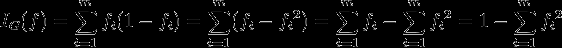

In [10]:
 #函数接受一个数据集，然后计算其混杂程度。  
#将这样的数学思维转为成代码是一件非常困难的事。  
#利用集合中每一项结果出现的次数除以集合的总行数计算出该结果的概率  
#出现k1的概率和不是k1的时候（k2）概率相乘，再依次把所有的这种的情况相加  
#就可以得到：某一行数据被随机分配到错误结果的总概率  
def giniimpurity(rows):
    total = len(rows)
    counts = uniquecounts(rows)
    imp = 0
    for k1 in counts:
        p1 = float(counts[k1])/total
        for k2 in counts:
            if k1==k2: continue
            p2 = float(counts[k2])/total
            imp += p1*p2
    return imp

计算混杂程度：熵  
熵是指集合无序的程度。熵可以由如下方式计算得出：
首先计算出每一项数据出现的频率（即数据项出现的次数除以集合的总行数），再使用如下公式：

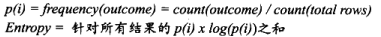

In [11]:
 #函数接受一个数据集，然后计算其混杂程度。使用熵来计算  
#熵遍历所有可能的结果的概率除以总行数的概率p，然后将所有的p做计算：p*log(p)，再将所有的这个结果加起来
def entropy(rows):
    from math import log
    log2 = lambda x:log(x)/log(2)
    results = uniquecounts(rows)
    #计算熵 
    ent = 0.0
    for r in results.keys():
        p=float(results[r])/len(rows)
        ent = ent - p *log2(p)
    return ent

In [12]:
giniimpurity(my_data)

0.6328125

In [13]:
entropy(my_data)

1.5052408149441479

In [14]:
set1,set2 = divideset(my_data,2,'yes')
entropy(set1)

1.2987949406953985

In [15]:
giniimpurity(set1)

0.53125

基尼不纯度和熵  
我们之所要计算混杂程度，就是为了最大限度降低拆分的两个集合的混杂程度。比如根据某一列一下拆分，就能拆分出使用高级功能和基本功能的用户，那么混杂程度最低，我们就找到了解决问题的关键。我们每一次的拆分，就是为了降低熵，能为0最好，不能也要不断想办法降低。
书中说道：基尼不纯度和熵的最大区别在于，对于混杂的程度，熵”判罚“的更重一些，人们对熵使用更为普遍。



递归构建树  
递归构造树的思维非常重要。其次，我们来构造树的整个过程：  

    算出根节点的熵  
    依次以每一列的不同结果来划分数据集  
    计算划分出来的两个数据集的熵  
    算出信息增益：根节点的熵和两个数据集经过加权平均后的熵的差值  
    比较以每一列的不同结果划分的而产生的信息增益  
    选择出信息增值最大的那一列的结果，作为根节点的划分依据（也就是熵减少最多的）  
    循环对将两个数据集分别作为根节点，重复从1步骤开始的过程  
    当信息增益不再增大后，停止。树构建完毕   

代码如下：  


In [16]:
def buildtree(rows,scoref = entropy):
    if len(rows) == 0: return decisionnode()#就是一个空节点呗 
    current_score = scoref(rows)
    
    #定义一些变量以方便记录最佳的拆分的条件
    best_gain = 0.0
    best_criteria = None
    best_sets = None
    
    #最后一列是用来存放结果的，本例中就是用户使用了高级功能、基本功能、没有，所以在选最佳属性的时候会忽略掉这一列  
    column_count = len(rows[0])-1
    for col in range(0,column_count):
        #在当前列中，形成一个不同值构成的序列，也就是说这一列有多少种可能的取值
        column_values = {}
        for row in rows:
            column_values[row[col]] = 1 #这样可以去重，碰到一样的词不更新，比如某一列有两个yes的话，但是最终最会一个yes在集合中
        #对这一列中的不同的每一个词，都尝试一次数据的拆分 
        for value in column_values.keys():
            (set1,set2) = divideset(rows,col,value)
            
            #计算信息增益  
            p = float(len(set1))/len(rows) ##计算出set1的权重，也就是set1的行数除以总行数
            gain = current_score - (p*scoref(set1) + (1-p)*scoref(set2)) #拆分前的熵与拆分后的熵的差值，越大说明熵减少得越多
            if gain > best_gain and len(set1) > 0 and len(set2) > 0:
                best_gain = gain
                best_criteria = (col,value)
                best_sets = (set1,set2)
                
    #创建子分支
    if best_gain > 0:
        trueBranch = buildtree(best_sets[0])
        falseBranch = buildtree(best_sets[1])
        return decisionnode(col = best_criteria[0],value=best_criteria[1],tb=trueBranch,fb=falseBranch)
    else:#不大于0，就是等于0，那么就这个集合不用再划分子集合了，就是叶节点，叶节点带有结果。
        return decisionnode(results=uniquecounts(rows))    

再总结一下代码的思路（因为非常重要）：  


上述函数接受一个初始数据的列表作为参数。然后遍历数据集中的每一列的每一个结果。针对用每一个结果，产生将数据集拆分为两个子集，
计算数据集和子集的信息增益，找到信息增值最大的那个结果。  
如果信息增益为0，就结束拆分，并且记录了最后的结果和次数（就是高级功能还是基本功能）。
在子集上还会调用这个函数，并把得到的结果加在这颗树上相应的True分支和False分支。  



In [17]:
tree = buildtree(my_data)

文本显示决策树：

In [18]:
def printtree(tree,indent=''):  
    #这是一个叶节点吗？  
    if tree.results!=None:  
        print(str(tree.results))
    else:  
        #打印判断条件  
        print(str(tree.col)+':'+str(tree.value)+'? ')  


        #打印分支  
        print (indent+'T->',)#print语句默认的会在后面加上 换行，加了逗号之后 换行 就变成了 空格  
        printtree(tree.tb,indent+' ')  
        print (indent+'F->',)#print语句默认的会在后面加上 换行，加了逗号之后 换行 就变成了 空格  
        printtree(tree.fb,indent+' ')  

In [19]:
printtree(tree)  

0:google? 
T->
3:21? 
 T->
{'Premium': 3}
 F->
2:no? 
  T->
{'None': 1}
  F->
{'Basic': 1}
F->
0:slashdot? 
 T->
{'None': 3}
 F->
2:yes? 
  T->
{'Basic': 4}
  F->
3:21? 
   T->
{'Basic': 1}
   F->
{'None': 3}


图形显示树：

In [20]:

def getwidth(tree):  
    if tree.tb==None and tree.fb==None: return 1  
    return getwidth(tree.tb)+getwidth(tree.fb)# 统计了有多少个子节点  
def getdepth(tree):  
    if tree.tb==None and tree.fb==None:return 0  
    return max(getdepth(tree.tb),getdepth(tree.fb))+1#每多一层就会加1  
from PIL import Image,ImageDraw  
def drawtree(tree,jpeg='tree.jpg'):  
    w=getwidth(tree)*100+120  
    h=getdepth(tree)*100+120  

    img=Image.new('RGB',(w,h),(255,255,255))  
    draw=ImageDraw.Draw(img)  

    drawnode(draw,tree,w/2,20)  
    img.save(jpeg,'JPEG')  

def drawnode(draw,tree,x,y):  
    if tree.results==None:  
        #得到每个分支的宽度  
        w1=getwidth(tree.fb)*100  
        w2=getwidth(tree.tb)*100  

        #确定此节点所要占据的总空间  
        left=x-(w1+w2)/2#确定左边界  
        right=x+(w1+w2)/2#确定右边界  

        #绘制判断条件的字符串  
        draw.text((x-20,y-10),str(tree.col)+':'+str(tree.value),(0,0,0))  

        #绘制到分支的连线  
        draw.line((x,y,left+w1/2,y+100),fill=(255,0,0))  
        draw.line((x,y,right-w2/2,y+100),fill=(255,0,0))  

        #绘制分支的节点  

        drawnode(draw,tree.fb,left+w1/2,y+100)  
        drawnode(draw,tree.tb,right-w2/2,y+100)  
    else:  
        txt=' \n'.join(['%s:%d' %v for v in tree.results.items()])#results是个字典，items方法将所有的字典项以列表的方式返回，列表中的项由（key,value）组成，返回项无特殊顺序。  
        draw.text(((x-20),y),txt,(0,0,0))  



In [21]:
drawtree(tree,jpeg='treeview.jpg')

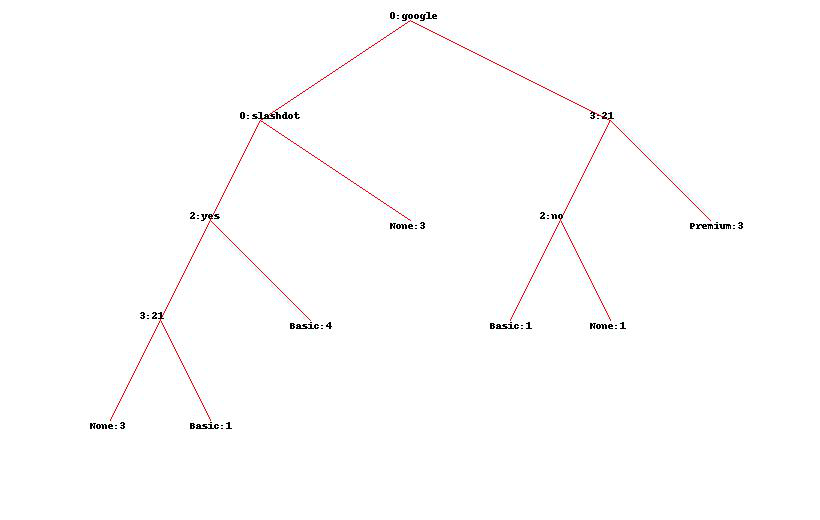

In [22]:
img = Image.open('treeview.jpg')
img

## 预测新数据分类：

来了一个新用户，我们收集了一些它的信息，然后我们想使用决策树来判断一下这个用户会使用什么样的功能（高级还是基本，还是None）。实际上，我们看着图，比对着这个用户的数据，我们自己找都能找出来，这里就是为了使用程序快捷方便的告诉我们。

In [23]:
#接受一个新的数据，然后让其决策树对其分类。
def classify(observation,tree):
    if tree.results != None:
        return tree.results
    else:
        v = observation[tree.col]#获取需要判断的那一列的数值 
        branch=None  
        if isinstance(v,int) or isinstance(v,float):  
            if v>=tree.value:branch=tree.tb  
            else: branch=tree.fb  
        else:  
            if v==tree.value:branch=tree.tb  
            else: branch=tree.fb  
        return classify(observation,branch)  

In [24]:
pridict=classify(['(direct)','USA','yes',5],tree) 
pridict


{'Basic': 4}

那如果新数据里面，有缺失的情况怎么办？也就是说，比如，我们未能通过追踪Ip查询到用户的所在地。所以第二列，用户所在地，就没有。我们也不希望我们的预测能够失效。此时，我们的应对方式，如果缺失的列，是必须要经过判断的地方，也就是分支处，那么我们选择两个分支都走。但是在返回给用户的最终结果上面，我们会给加上一个权重，就是该分支的数据占所有数据的比例。

In [25]:

#接受一个新的数据，然后让其决策树对其分类。  
#该函数可以接受该新数据中缺失了需要判断的数据，返回的结果中会给出最终类型的概率  
def mdclassify(observation,tree):  
    if tree.results!=None:  
        return tree.results  
    else:  
        v=observation[tree.col]#tree.col是当前节点需要判断的值，v是取出了需要被分类的数据的具体的值  
        if v==None:#如果需要判断的值缺失  
            tr,fr=mdclassify(observation,tree.tb),mdclassify(observation,tree.fb)  
            tcount=sum(tr.values())#tr,fr是一个字典，而其中values()是用一个列表返回所有的字典中的键值对的值。  
            fcount=sum(fr.values())  
            tw=float(tcount)/(tcount+fcount)#这是一个权重，而这个权重的某一结果的行数占全部行数的比例  
            fw=float(fcount)/(tcount+fcount)  
            result={}  
            for k,v in tr.items():result[k]=v*tw  
            for k,v in fr.items():  
                if k not in result:result[k]=0  
                result[k] +=v*fw  
            return result  
        else:#如果需要判断的值不缺失的话  
            if isinstance(v,int) or isinstance(v,float):#如果需要判断的数是数值型，那么就是大于或者小于  
                if v>=tree.value:branch=tree.tb  
                else: branch=tree.fb  
            else:#如果需要判断的数是布尔型，，那么就是是或者否  
                if v==tree.value:branch=tree.tb  
                else:branch=tree.fb  
            return mdclassify(observation,branch)  

In [26]:
pridict=mdclassify(['google','France',None,None],tree)
pridict

{'Basic': 0.125, 'None': 0.125, 'Premium': 2.25}

由此可以看出，当给上['google','France',None,None]这样的用户数据，我们可以得到其成为Premium的可能性最大。

## 剪枝：

 所谓剪枝，就是指，有些支点拆成两个，也不会使熵降低太多。所以，我们将熵不会降低特别多的枝节点的两个叶节点合并为一个叶节点。
那为什么我们在建造树的过程中，就让降低熵加大一些呢？这样就可以提早结束拆分，但是这样会缺乏考虑一种情况，就是虽然这一次分了之后的熵没降低多少，但是下一次会降低非常多呀。所以，我们采用剪枝的方式，而不是提早结束。
代码如下：

In [27]:

#剪枝函数，基本思想是，判断某一个枝节点的两个叶节点能否合并  
#依据：合并后的熵只有微弱的增加，增加的程度小于mingain。也就是把这个枝节点拆了熵也降低不了多少  
#mingain人为定的阈值  
def prune(tree,mingain):  
    #如果该分支不是叶节点，则对其进行剪枝操作  
    if tree.tb.results==None:  
        prune(tree.tb,mingain)  
    if tree.fb.results==None:  
        prune(tree.fb,mingain)  
    #如果两个分支都是叶节点，则判断它们是否应该被合并  
    if tree.tb.results!=None and tree.fb.results!=None:  
        #构造合并后的数据集  
        tb,fb=[],[]  
        for v,c in tree.tb.results.items():#results是字典，items方法返回相应的键和值  
            tb+=[[v]]*c  
        for v,c in tree.fb.results.items():  
            fb+=[[v]]*c  
        #检查熵的减少情况  
        delta=entropy(tb+fb)-(entropy(tb)+entropy(fb)/2)  
        #上句和书中保持一下，结果也与书中一致。但是为什么不是下句呢？  
        #delta=entropy(tb+fb)-(entropy(tb)+entropy(fb))/2  
        #难道不是左右节点的熵的和，再除以2？为什么单独对entropy（fb）的熵除以2呢？  
        #反正我估计是书错了  
        if delta<mingain:  
            #合并分支  
            tree.tb,tree.fb=None,None  
            tree.results=uniquecounts(tb+fb)  



In [28]:
 prune(tree,1.0)  
printtree(tree)

0:google? 
T->
3:21? 
 T->
{'Premium': 3}
 F->
2:no? 
  T->
{'None': 1}
  F->
{'Basic': 1}
F->
{'None': 6, 'Basic': 5}


结果为数值类型时
上实例中，最后的结果：高级功能、基本功能、None。但是有时候最后的结果可能是数字，比如说对房屋价格的预测，这还是一连续的数字。
这个问题，我现在就不深究了，解决办法就是用方差来替代熵或者基尼不纯度。书中也有对房屋价格的预测的例子，需要时再研究。

In [29]:

#使用数字来作为一颗决策树的结果时，我们可以使用方差来代替计算混杂程度的：熵和基尼不纯度  
def variance(rows):  
    if len(rows)==0:return 0  
    data=[float(row[len(row)-1])for row in rows]  
    mean=sum(data)/len(data)  
    variance=sum([d-mean**2 for d in data])/len(data)  
    return variance  

总结

    决策树的推导过程也是非常有意义的，人们很多时候也通过推导过程获得更多信息
    给予受训练的模型进行了解释，也就是因为它来自google网站，所以是使用高级功能的用户
    决策不仅能够处理分类：是否读过FAQ（yes或者no），还可以处理数值类型：浏览网页次数
    即使缺失了部分用户数据还是能够作出预测
    如果结果非常多，决策树非常复杂，可能失效。实例中只有三个，效果比较好
    处理数值的列的时候，不能够仅仅大于或者小于，也许还有更为复杂的组合。比如，某两列的差、某一列的大于一个数且小于一个数。如果组合一多，树会非常复杂
    大量输入和输出的情况下，决策树未必是非常好的组合。
    多个数值列，存在复杂关系时，比如金融数据时，决策树不是好选择
    决策树适合大量分类明确，数值分界点明确的数据处理